In [1]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import pandas as pd
from scipy import stats
from scipy.special import expit as logistic
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

#### Code 12.1

In [2]:
d = pd.read_csv('Data/reedfrogs.csv', sep=",")
print(d.shape)
d.head(8)

(48, 5)


,density,pred,size,surv,propsurv
0,10,no,big,9,0.9
1,10,no,big,10,1.0
2,10,no,big,7,0.7
3,10,no,big,10,1.0
4,10,no,small,9,0.9
5,10,no,small,9,0.9
6,10,no,small,10,1.0
7,10,no,small,9,0.9


#### Code 12.2

In [3]:
# make the tank cluster variable
tank = np.arange(d.shape[0])
# fit
with pm.Model() as m_12_1:
    a_tank = pm.Normal('a_tank', 0, 5, shape=d.shape[0])
    p = pm.math.invlogit(a_tank[tank])
    surv = pm.Binomial('surv', n=d.density, p=p, observed=d.surv)
    trace_12_1 = pm.sample(2000, tune=2000, njobs=4)
pm.summary(trace_12_1, alpha=.11).round(2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a_tank]
Sampling 4 chains: 100%|██████████| 16000/16000 [00:22<00:00, 699.60draws/s]


,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat
a_tank__0,2.51,1.18,0.02,0.67,4.31,6475.90,1.0
a_tank__1,5.68,2.70,0.03,1.70,9.61,5097.79,1.0
a_tank__2,0.94,0.74,0.01,-0.24,2.09,8765.67,1.0
a_tank__3,5.66,2.70,0.04,1.71,9.69,4659.96,1.0
a_tank__4,2.51,1.15,0.01,0.75,4.28,6160.09,1.0
a_tank__5,2.52,1.20,0.02,0.75,4.44,5474.40,1.0
a_tank__6,5.76,2.79,0.04,1.56,9.67,4348.88,1.0
a_tank__7,2.55,1.20,0.02,0.72,4.31,6390.88,1.0
a_tank__8,-0.44,0.68,0.01,-1.50,0.70,8920.17,1.0
a_tank__9,2.50,1.16,0.01,0.80,4.37,6075.24,1.0


#### Code 12.3

In [4]:
with pm.Model() as m_12_2:
    a = pm.Normal('a', 0., 1.)
    sigma = pm.HalfCauchy('sigma', 1.)
    a_tank = pm.Normal('a_tank', a, sigma, shape=d.shape[0])
    p = pm.math.invlogit(a_tank[tank])
    surv = pm.Binomial('surv', n=d.density, p=p, observed=d.surv)
    trace_12_2 = pm.sample(2000, tune=2000, njobs=4)
pm.summary(trace_12_2, alpha=.11).round(2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a_tank, sigma, a]
Sampling 4 chains: 100%|██████████| 16000/16000 [00:16<00:00, 958.65draws/s] 


,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat
a,1.30,0.26,0.00,0.88,1.70,8403.18,1.0
a_tank__0,2.13,0.88,0.01,0.78,3.50,11808.09,1.0
a_tank__1,3.06,1.12,0.01,1.28,4.74,8972.12,1.0
a_tank__2,0.99,0.67,0.00,-0.09,2.03,19907.91,1.0
a_tank__3,3.07,1.11,0.01,1.30,4.74,9659.72,1.0
a_tank__4,2.13,0.88,0.01,0.69,3.43,11641.67,1.0
a_tank__5,2.13,0.88,0.01,0.75,3.50,12992.16,1.0
a_tank__6,3.06,1.12,0.01,1.19,4.66,10099.73,1.0
a_tank__7,2.12,0.88,0.01,0.69,3.44,10561.91,1.0
a_tank__8,-0.18,0.62,0.01,-1.13,0.84,14380.58,1.0


#### Code 12.4

In [5]:
comp_df = pm.compare({m_12_1 : trace_12_1,
                      m_12_2 : trace_12_2},
                     method='pseudo-BMA')

comp_df.loc[:,'model'] = pd.Series(['m12.1', 'm12.2'])
comp_df = comp_df.set_index('model')
comp_df

/home/damianos/.conda/envs/statRethinkPymc3/lib/python3.7/site-packages/pymc3/stats.py:167: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.stack(logp)
/home/damianos/.conda/envs/statRethinkPymc3/lib/python3.7/site-packages/pymc3/stats.py:218: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


,WAIC,pWAIC,dWAIC,weight,SE,dSE,var_warn
model,,,,,,,
m12.2,201.05,21.36,0,0.59,7.27,0,1
m12.1,201.77,22.74,0.72,0.41,9.37,4.44,1


#### Code 12.5

In [6]:
# extract PyMC3 samples
post = pm.trace_to_dataframe(trace_12_2, varnames=['a_tank'])

# compute median intercept for each tank
# also transform to probability with logistic
# remember that in the model p_survival ~ pm.math.invlogit(a_tank[tank])
d.loc[:, 'propsurv_est'] = pd.Series(logistic(post.median(axis=0).values), index=d.index)

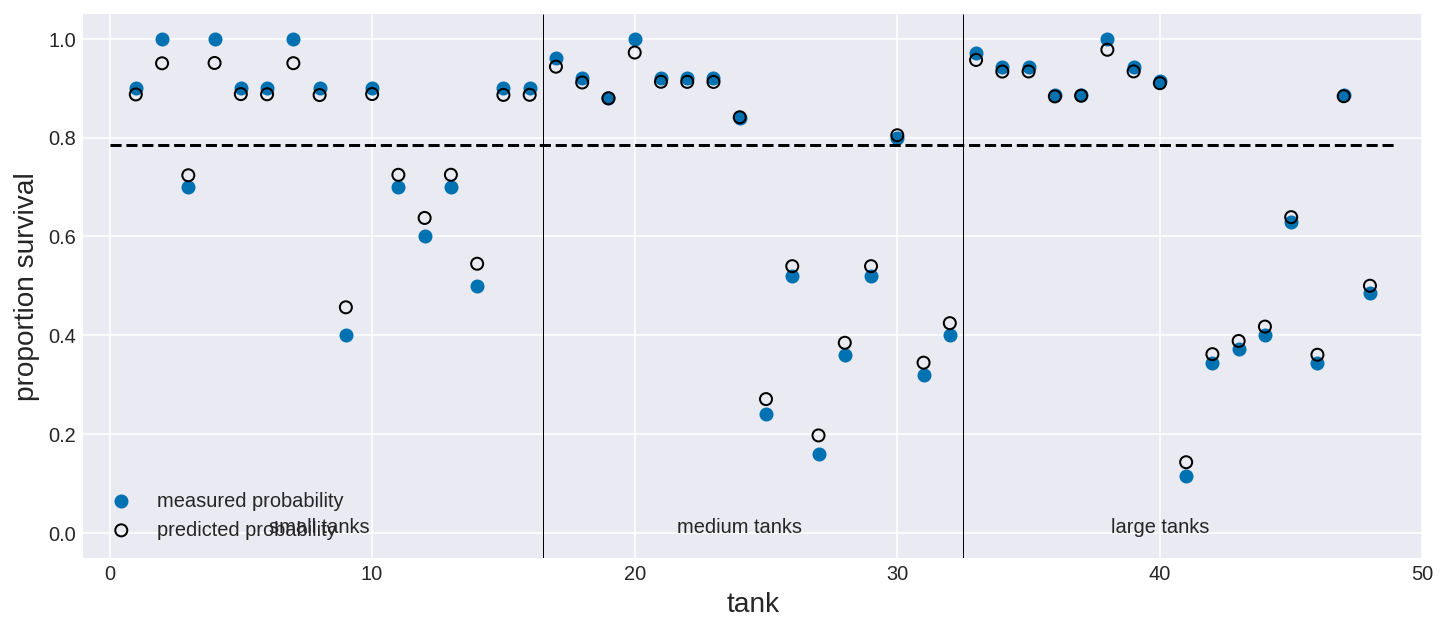

In [7]:
_, ax = plt.subplots(1, 1, figsize=(12, 5))
# display raw proportions surviving in each tank
ax.scatter(np.arange(1, 49), d.propsurv, label = 'measured probability')
ax.scatter(np.arange(1, 49), d.propsurv_est,
             facecolors='none', edgecolors='k', lw=1, label = 'predicted probability')
# remember that 'a' is the distribution of the means of the distribution of intercepts a_tank
ax.hlines(logistic(np.median(trace_12_2['a'], axis=0)), 0, 49, linestyles='--')
ax.vlines([16.5, 32.5], -.05, 1.05, lw=.5)
ax.text(8, 0, "small tanks", horizontalalignment='center')
ax.text(16+8, 0, "medium tanks", horizontalalignment='center')
ax.text(32+8, 0, "large tanks", horizontalalignment='center')
ax.set_xlabel('tank', fontsize=14)
ax.set_ylabel('proportion survival', fontsize=14)
ax.set_xlim(-1, 50)
ax.set_ylim(-.05, 1.05);
ax.legend();

In every tank, the posterior median from the multilevel model is closer to the dashed line than the empirical proportion is. This reflects the pooling of information across tanks, to help with inference about each tank.

#### Code 12.6

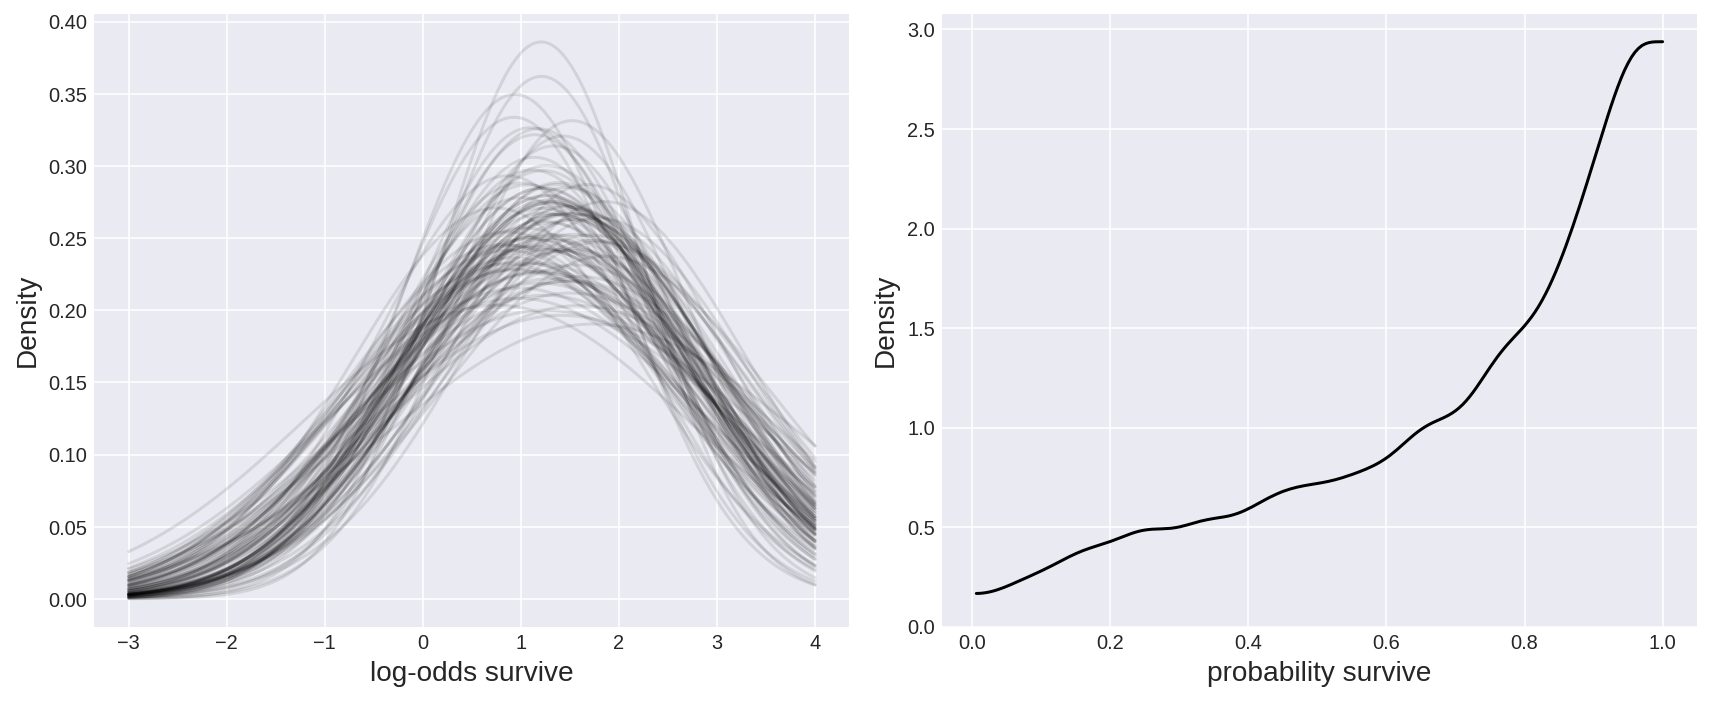

In [8]:
_, ax = plt.subplots(1, 2, figsize=(12, 5))
# show first 100 populations in the posterior
xrange = np.linspace(-3, 4, 200)
postcurve = [stats.norm.pdf(xrange, loc=trace_12_2['a'][i], scale=trace_12_2['sigma'][i]) for i in range(100)]
ax[0].plot(xrange, np.asarray(postcurve).T,
           alpha=.1, color='k')
ax[0].set_xlabel('log-odds survive', fontsize=14)
ax[0].set_ylabel('Density', fontsize=14);
# sample 8000 imaginary tanks from the posterior distribution
sim_tanks = np.random.normal(loc=trace_12_2['a'], scale=trace_12_2['sigma'])
# transform to probability and visualize
pm.kdeplot(logistic(sim_tanks), ax=ax[1], color='k')
ax[1].set_xlabel('probability survive', fontsize=14)
ax[1].set_ylabel('Density', fontsize=14)
plt.tight_layout();
# dens( logistic(sim_tanks) , xlab="probability survive" )

#### Code 12.7

In [9]:
a, sigma, nponds = 1.4, 1.5, 60
ni = np.repeat([5, 10, 25, 35], 15) # 4x15=60

#### Code 12.8

In [10]:
a_pond = np.random.normal(loc=a, scale=sigma, size=nponds)

In [11]:
a_pond

array([ 2.19171001,  1.60031222, -0.18212562,  2.53175715,  2.17382375,
        0.88054709,  3.27859092,  2.61554147,  3.16276354, -1.00063753,
        2.74518262, -0.27669206,  1.28290721,  1.51885346,  4.99028753,
        3.78149416,  0.496405  ,  3.58958032, -0.9239121 ,  1.00552032,
        1.66546449, -1.62078409, -0.16393295,  1.39956316,  0.7671832 ,
        1.82849331, -0.42847332,  2.27939502,  0.96529483,  4.38246061,
        2.26110516,  1.18995324,  5.25935709,  3.90291696,  2.3683243 ,
        2.75917508,  1.95263359,  3.82527309,  2.57551534,  3.19823221,
        2.79771609,  1.28835761,  1.16961395,  3.0201852 ,  2.68022107,
        2.0018536 ,  0.43690125,  1.04283117, -0.41736583, -0.97980934,
        1.65177379,  0.7924758 ,  1.92880652,  1.00334739,  2.43644168,
        2.43564371,  0.2124254 ,  0.19054042,  1.29373968,  0.26700535])

#### Code 12.9

In [12]:
dsim = pd.DataFrame(dict(pond=np.arange(nponds), ni=ni, true_a=a_pond))
dsim.head()

,pond,ni,true_a
0,0,5,2.191710
1,1,5,1.600312
2,2,5,-0.182126
3,3,5,2.531757
4,4,5,2.173824


#### Code 12.10
Data types related. Python is dynamically-typed.

#### Code 12.11

In [13]:
dsim.loc[:, 'si'] = np.random.binomial(dsim['ni'], logistic(dsim['true_a']))

In [14]:
dsim.head()

,pond,ni,true_a,si
0,0,5,2.191710,5
1,1,5,1.600312,4
2,2,5,-0.182126,2
3,3,5,2.531757,5
4,4,5,2.173824,4


#### Code 12.12

In [15]:
dsim.loc[:, 'p_nopool'] = dsim.si / dsim.ni

In [16]:
dsim.head()

,pond,ni,true_a,si,p_nopool
0,0,5,2.191710,5,1.0
1,1,5,1.600312,4,0.8
2,2,5,-0.182126,2,0.4
3,3,5,2.531757,5,1.0
4,4,5,2.173824,4,0.8


#### Code 12.13

In [17]:
with pm.Model() as m_12_3:
    a = pm.Normal('a', 0., 1.)
    sigma = pm.HalfCauchy('sigma', 1.)
    a_pond = pm.Normal('a_pond', a, sigma, shape=nponds)
    p = pm.math.invlogit(a_pond[dsim.pond.values])
    si = pm.Binomial('si', n=dsim.ni.values, p=p, observed=dsim.si)
    trace_12_3 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a_pond, sigma, a]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:06<00:00, 585.47draws/s]


#### Code 12.14

In [18]:
summary_12_3 = pm.summary(trace_12_3, alpha=.11)
summary_12_3.iloc[[0, 1, 2, -3, -2, -1],:].round(2)

,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat
a,1.54,0.21,0.01,1.21,1.87,1558.16,1.0
a_pond__0,2.54,1.11,0.02,0.83,4.26,2642.29,1.0
a_pond__1,1.61,0.93,0.02,0.07,2.96,2571.26,1.0
a_pond__58,1.12,0.38,0.01,0.52,1.74,2865.67,1.0
a_pond__59,0.24,0.34,0.01,-0.29,0.79,3290.70,1.0
sigma,1.40,0.20,0.01,1.07,1.70,552.23,1.0


#### Code 12.15

In [19]:
estimated_a_pond = pm.summary(trace_12_3, alpha=.11, varnames=['a_pond'])
dsim.loc[:, 'p_partpool'] = logistic(estimated_a_pond['mean'].values)

In [20]:
dsim.head()

,pond,ni,true_a,si,p_nopool,p_partpool
0,0,5,2.191710,5,1.0,0.927021
1,1,5,1.600312,4,0.8,0.832766
2,2,5,-0.182126,2,0.4,0.547917
3,3,5,2.531757,5,1.0,0.925295
4,4,5,2.173824,4,0.8,0.825423


#### Code 12.16

In [21]:
dsim.loc[:, 'p_true'] = logistic(dsim['true_a'].values)

In [22]:
dsim.head()

,pond,ni,true_a,si,p_nopool,p_partpool,p_true
0,0,5,2.191710,5,1.0,0.927021,0.899503
1,1,5,1.600312,4,0.8,0.832766,0.832062
2,2,5,-0.182126,2,0.4,0.547917,0.454594
3,3,5,2.531757,5,1.0,0.925295,0.926338
4,4,5,2.173824,4,0.8,0.825423,0.897874


#### Code 12.17

In [23]:
nopool_error = np.abs(dsim.p_nopool - dsim.p_true)
partpool_error = np.abs(dsim.p_partpool - dsim.p_true)

#### Code 12.18

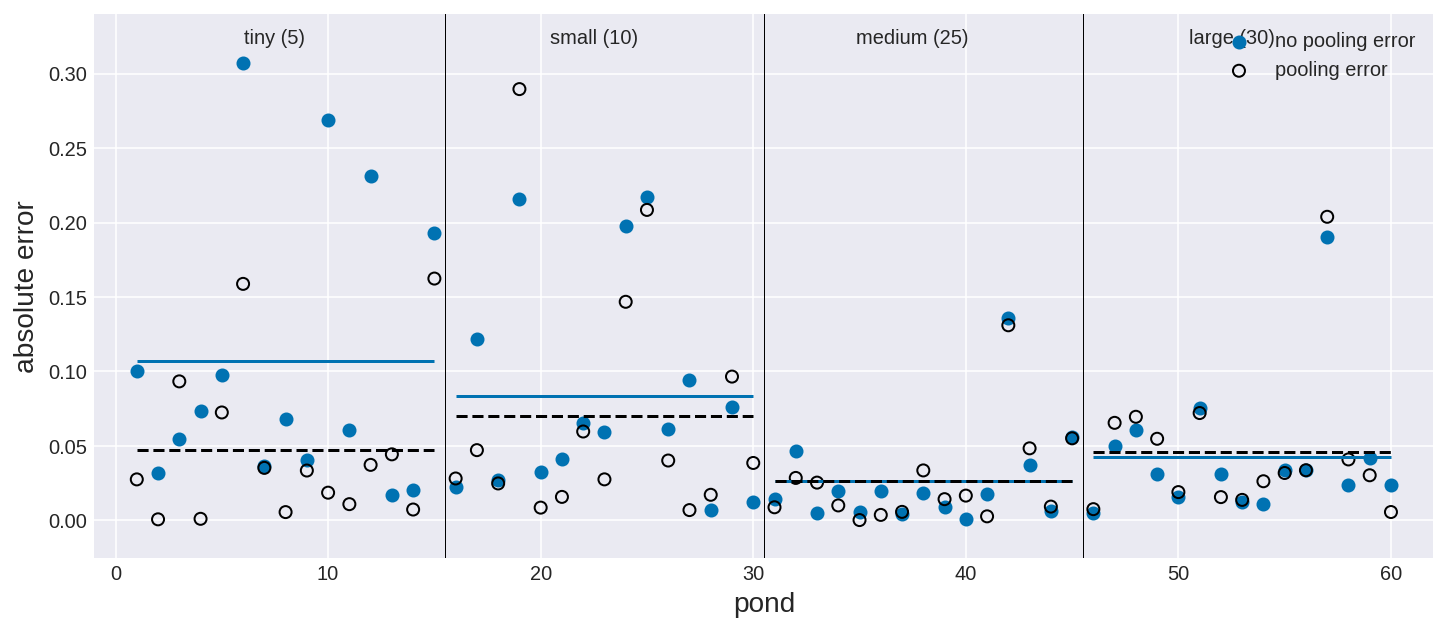

In [24]:
_, ax = plt.subplots(1, 1, figsize=(12, 5))
xrange = np.arange(60)
xrange_ = xrange.reshape((4, 15))
# display raw proportions surviving in each tank
ax.scatter(xrange+1, nopool_error, label='no pooling error')
ax.scatter(xrange+1, partpool_error,
             facecolors='none', edgecolors='k', lw=1, label='pooling error')
ax.vlines(xrange_[1:,0]+.5, -.025, 0.35, lw=.5)

textall = ["tiny (5)", "small (10)", "medium (25)", "large (30)"]
for isem in range(4):
    ax.hlines(nopool_error[xrange_[isem, :]].mean(), 
              xrange_[isem, 0]+1, xrange_[isem, -1]+1, color='C0')
    ax.hlines(partpool_error[xrange_[isem, :]].mean(), 
              xrange_[isem, 0]+1, xrange_[isem, -1]+1, color='k', linestyles='--')
    ax.text(xrange_[isem, 7]+.5, 0.32, textall[isem], horizontalalignment='center')
ax.set_xlabel('pond', fontsize=14)
ax.set_ylabel('absolute error', fontsize=14)
ax.set_xlim(-1, 62)
ax.set_ylim(-.025, 0.34);
ax.legend();

#### Code 12.19

This part is more Stan and rethinking related. To do the same in PyMC3 (i.e., avoide compiling the same model twice), you need to set up the input data with `theano.shared` or use [sampled](https://github.com/ColCarroll/sampled), a functional decorator for PyMC3.

#### Code 12.20

In [25]:
y1 = np.random.normal(10., 1., 10000)
y2 = 10. + np.random.normal(0., 1., 10000)

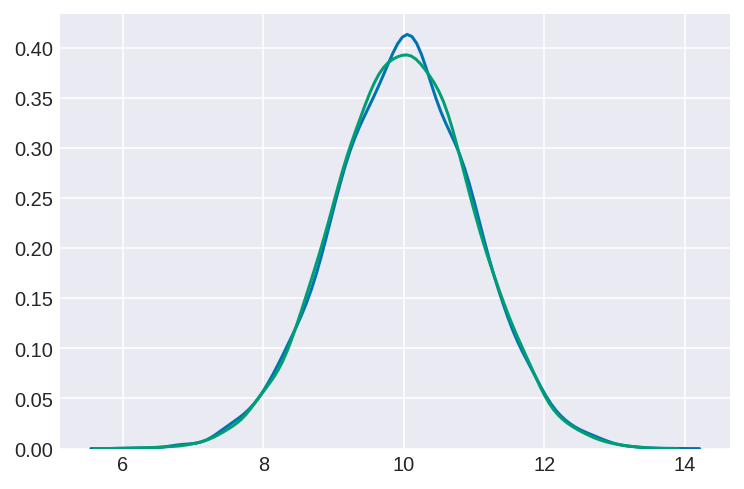

In [26]:
fig, ax = plt.subplots()
sns.kdeplot(y1,ax=ax)
sns.kdeplot(y2,ax=ax);

#### Code 12.21

In [27]:
d = pd.read_csv('Data/chimpanzees.csv', sep=";")
# we change "actor" to zero-index
d.actor = (d.actor - 1).astype(int)
Nactor = len(d.actor.unique())

with pm.Model() as m_12_4:
    bp = pm.Normal('bp', 0, 10)
    bpC = pm.Normal('bpC', 0, 10)
    
    a = pm.Normal('a', 0, 10)
    sigma_actor = pm.HalfCauchy('sigma_actor', 1.)
    a_actor = pm.Normal('a_actor', 0., sigma_actor, shape=Nactor)
    # adding `a` in the model is the same as having `a` as the mean of the normal distribution (prior)
    # of a_actor, see plot above as an example
    p = pm.math.invlogit(a + a_actor[d.actor.values] + (bp + bpC * d.condition) * d.prosoc_left)
    pulled_left = pm.Binomial('pulled_left', 1, p, observed=d.pulled_left)

    trace_12_4 = pm.sample(5000, tune=1000, njobs=4)
# pm.traceplot(trace_12_4)
# pm.summary(trace_12_4, alpha=.11).round(2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a_actor, sigma_actor, a, bpC, bp]
Sampling 4 chains: 100%|██████████| 24000/24000 [02:03<00:00, 194.85draws/s]
The acceptance probability does not match the target. It is 0.8823091000903023, but should be close to 0.8. Try to increase the number of tuning steps.
There were 43 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.08899536675120619, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


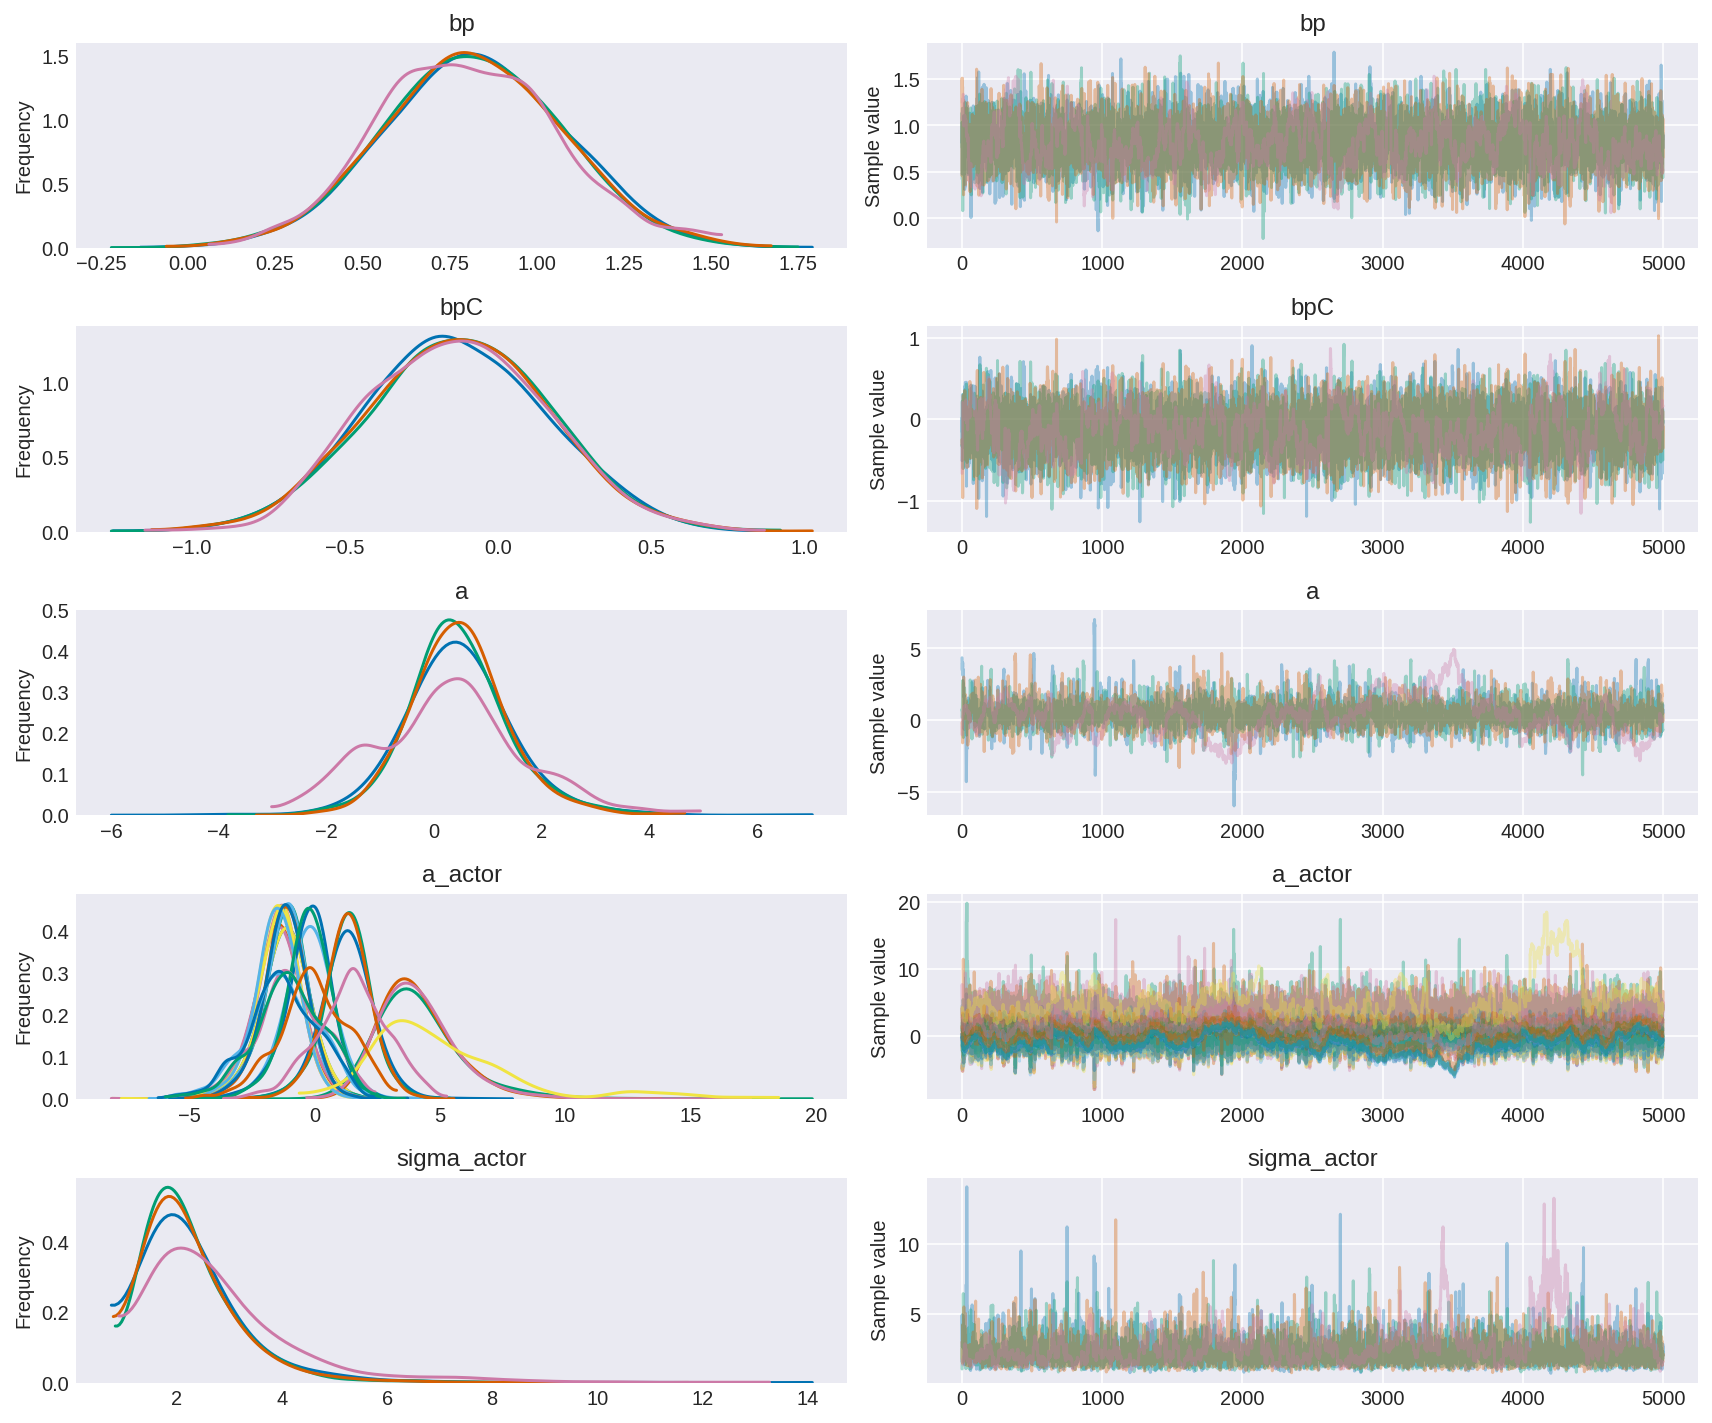

In [28]:
pm.traceplot(trace_12_4);

In [29]:
pm.summary(trace_12_4, alpha=.11).round(2)

,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat
bp,0.82,0.26,0.01,0.41,1.23,1105.98,1.00
bpC,-0.13,0.29,0.01,-0.60,0.32,1059.16,1.00
a,0.41,1.07,0.06,-1.40,2.06,99.23,1.00
a_actor__0,-1.12,1.09,0.06,-2.98,0.54,99.30,1.00
a_actor__1,4.40,2.13,0.14,1.71,7.10,96.01,1.03
a_actor__2,-1.43,1.09,0.06,-3.19,0.33,100.49,1.00
a_actor__3,-1.43,1.09,0.06,-3.16,0.36,102.07,1.00
a_actor__4,-1.13,1.09,0.06,-2.83,0.69,103.06,1.00
a_actor__5,-0.18,1.09,0.06,-1.93,1.60,101.51,1.00
a_actor__6,1.36,1.11,0.06,-0.33,3.23,103.99,1.00


#### Code 12.22

In [30]:
total_a_actor = np.asarray([trace_12_4['a'] + trace_12_4['a_actor'][:, i] for i in range(Nactor)])
total_a_actor.mean(axis=1).round(2)

array([-0.71,  4.82, -1.01, -1.02, -0.71,  0.23,  1.77])

#### Code 12.23

In [31]:
d.block = (d.block - 1).astype(int)
Nblock = len(d.block.unique())

with pm.Model() as m_12_5:
    bp = pm.Normal('bp', 0, 10)
    bpC = pm.Normal('bpC', 0, 10)
    
    a = pm.Normal('a', 0, 10)
    sigma_actor = pm.HalfCauchy('sigma_actor', 1.)
    a_actor = pm.Normal('a_actor', 0., sigma_actor, shape=Nactor)

    sigma_block = pm.HalfCauchy('sigma_block', 1.)
    a_block = pm.Normal('a_block', 0., sigma_block, shape=Nblock)
    # having a single intercept (a) and variations around it due to actor (a_actor)
    # and block (a_block) is better practice that having different "intercepts" build-in the
    # priors of a_block and a_actor as their means (instead their means are zero)
    p = pm.math.invlogit(a + a_actor[d.actor.values] + a_block[d.block.values]
                         + (bp + bpC * d.condition) * d.prosoc_left)
    pulled_left = pm.Binomial('pulled_left', 1, p, observed=d.pulled_left)

    trace_12_5 = pm.sample(6000, tune=1000, njobs=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a_block, sigma_block, a_actor, sigma_actor, a, bpC, bp]
Sampling 4 chains: 100%|██████████| 28000/28000 [03:34<00:00, 130.65draws/s]
There were 20 divergences after tuning. Increase `target_accept` or reparameterize.
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.
There were 21 divergences after tuning. Increase `target_accept` or reparameterize.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


#### Code 12.24

In [32]:
pm.summary(trace_12_5, alpha=.11).round(2)

,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat
bp,0.83,0.26,0.00,0.41,1.24,19276.45,1.0
bpC,-0.14,0.30,0.00,-0.62,0.33,18834.57,1.0
a,0.45,0.96,0.01,-1.00,1.89,3987.23,1.0
a_actor__0,-1.16,0.97,0.01,-2.59,0.38,4213.06,1.0
a_actor__1,4.18,1.67,0.02,1.74,6.36,5186.77,1.0
a_actor__2,-1.47,0.97,0.01,-2.92,0.03,4214.22,1.0
a_actor__3,-1.47,0.97,0.01,-2.92,0.03,4103.14,1.0
a_actor__4,-1.16,0.97,0.01,-2.64,0.31,4186.82,1.0
a_actor__5,-0.22,0.97,0.01,-1.69,1.27,4057.89,1.0
a_actor__6,1.32,0.99,0.01,-0.17,2.86,4294.15,1.0


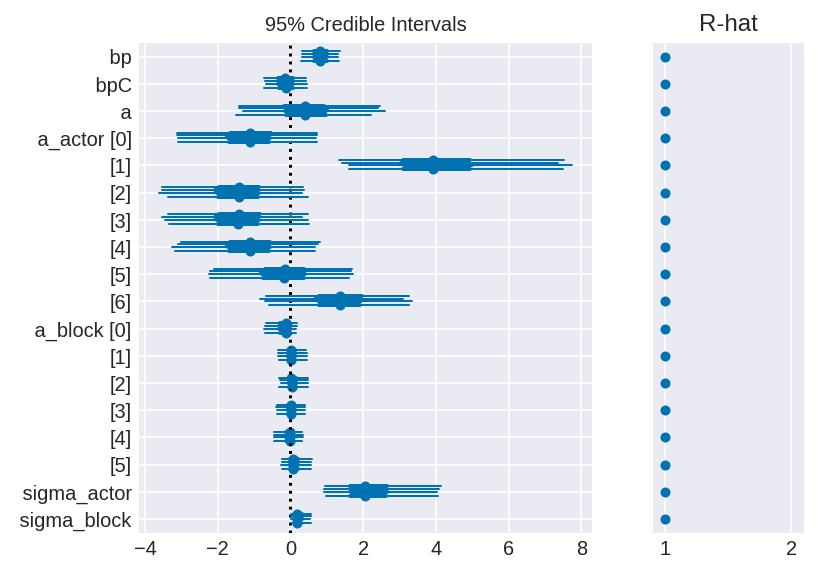

In [33]:
pm.forestplot(trace_12_5);

#### Code 12.25

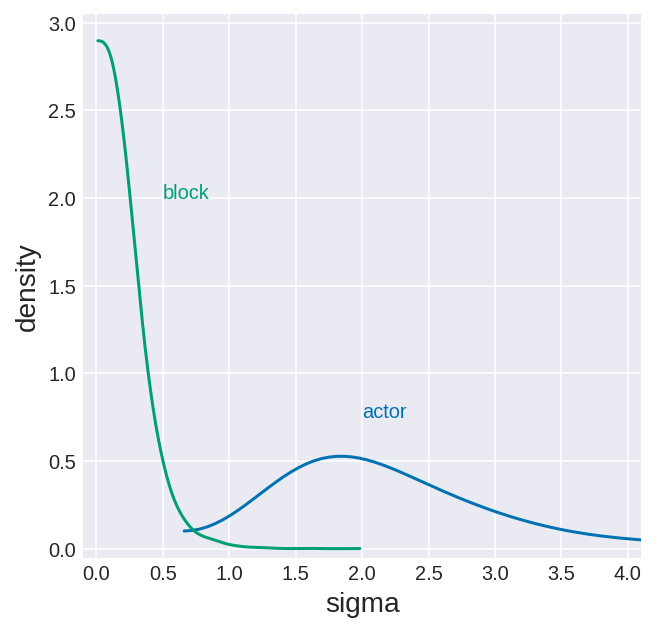

In [34]:
_, ax = plt.subplots(1, 1, figsize=(5, 5))
pm.kdeplot(trace_12_5['sigma_actor'], ax=ax)
pm.kdeplot(trace_12_5['sigma_block'], ax=ax)
ax.text(2, 0.75, "actor", color='C0')
ax.text(0.5, 2, "block", color='C1')
ax.set_xlabel('sigma', fontsize=14)
ax.set_ylabel('density', fontsize=14)
ax.set_xlim(-0.1, 4.1)
ax.set_ylim(-0.05, 3.05);

#### Code 12.26

In [35]:
comp_df = pm.compare({m_12_4 : trace_12_4, 
                      m_12_5 : trace_12_5},
                     method='pseudo-BMA')

comp_df.loc[:,'model'] = pd.Series(['m12.4', 'm12.5'])
comp_df = comp_df.set_index('model')
comp_df

/home/damianos/.conda/envs/statRethinkPymc3/lib/python3.7/site-packages/pymc3/stats.py:167: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.stack(logp)
/home/damianos/.conda/envs/statRethinkPymc3/lib/python3.7/site-packages/pymc3/stats.py:167: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.stack(logp)


,WAIC,pWAIC,dWAIC,weight,SE,dSE,var_warn
model,,,,,,,
m12.4,531.25,8.09,0,0.69,19.47,0,0
m12.5,532.81,10.47,1.56,0.31,19.67,1.77,0


pWAIC reports the effective number of parameters. While m12.5 has 7 more parameters than m12.4 does, it has only about 2.5 more effective parameters. Why? Because the posterior distribution for sigma_block ended up close to zero. This means each of the 6 a_block parameters is strongly shrunk towards zero—they are relatively inflexible. In contrast, the a_actor parameters are shrunk towards zero much less, because the estimated variation across actors is much larger, resulting in less shrinkage. But as a consequence, each of the a_actor parameters contributes much more to the pWAIC value.

You might also notice that the difference in WAIC between these models is small, only 1.2. This is especially small compared the standard deviation of the difference, 1.94. These two models imply nearly identical predictions, and so their expected out-of-sample accuracy is nearly identical. The block parameters have been shrunk so much towards zero that they do very little work in the model.

#### Code 12.27

In [36]:
chimp = 6 - 1
# indices for actor indicated by `chimp`
sel_actor = np.where((d.actor == (chimp)).values)[0]
# indices of sel_actor and unique combinations of ['condition', 'prosoc_left']
_, uni_cond = np.unique(d.loc[sel_actor, ['condition', 'prosoc_left']], 
                        axis=0, return_index=True, )
d.loc[sel_actor[uni_cond], :]

,actor,recipient,condition,block,trial,prosoc_left,chose_prosoc,pulled_left
361,5,NaN,0,0,4,0,1,0
360,5,NaN,0,0,2,1,1,1
397,5,8.0,1,0,3,0,1,0
396,5,3.0,1,0,1,1,1,1


In [37]:
ppc = pm.sample_ppc(trace=trace_12_4, samples=1000, model=m_12_4)

/home/damianos/.conda/envs/statRethinkPymc3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  """Entry point for launching an IPython kernel.
100%|██████████| 1000/1000 [00:00<00:00, 1284.09it/s]


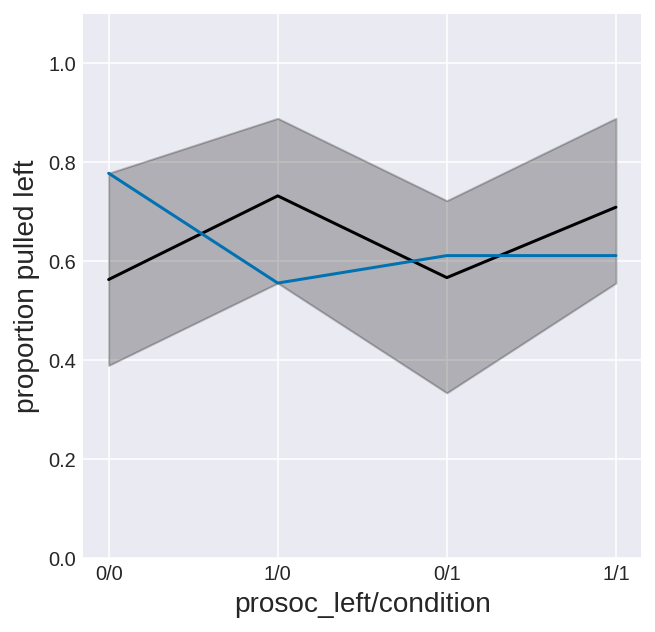

In [38]:
# traces of predictions for selected_actor (chimp)
rt = ppc['pulled_left'][:, sel_actor]

pred_mean = np.zeros((1000, 4))
cond = d.condition.unique()
prosoc_l = d.prosoc_left.unique()
for i in range(len(rt)):
    tmp = []
    for cp in cond:
        for pl in prosoc_l:
            # filter predictions only in cases that the predictor value
            # combinations are valid
            tmp.append(np.mean(rt[i][(d.prosoc_left[sel_actor].values==pl) &
                                     (d.condition[sel_actor].values==cp)]))
    # tmp holds the mean prediction under each set of predictors
    # e.g. [1.0, 1.0, 0.9444444444444444, 0.9444444444444444]
    pred_mean[i] = tmp
# pred_mean are the predictions     
mp = pred_mean.mean(0)
hpd = pm.hpd(pred_mean, alpha=.11)

_, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.fill_between(range(4), hpd[:,1], hpd[:,0], alpha=0.25, color='k')
ax.plot(mp, color='k')
chimps = d.groupby(['actor', 'prosoc_left', 'condition']).agg('mean')['pulled_left'].values.reshape(7, -1)
ax.plot(chimps[chimp], 'C0')

ax.set_ylim(0, 1.1)
ax.set_xlabel("prosoc_left/condition", fontsize=14)
ax.set_ylabel("proportion pulled left", fontsize=14)
plt.xticks(range(4), ("0/0","1/0","0/1","1/1"));

#### Code 12.28

In [39]:
post = pm.trace_to_dataframe(trace_12_4)
post.head()

,bp,bpC,a,a_actor__0,a_actor__1,a_actor__2,a_actor__3,a_actor__4,a_actor__5,a_actor__6,sigma_actor
0,0.813709,-0.507208,4.352920,-4.899149,4.462118,-4.978538,-5.286838,-5.092765,-3.718118,-2.264233,4.873200
1,1.035354,0.022065,3.604186,-4.322575,2.612698,-4.570507,-4.729906,-4.207771,-3.604269,-1.919488,2.631025
2,0.474298,-0.160050,3.471823,-4.129037,2.326120,-4.354932,-4.474228,-3.921049,-3.466410,-1.337947,4.941367
3,0.759664,0.303660,3.978102,-5.079711,0.738553,-5.207680,-5.284752,-4.677537,-4.213300,-2.960949,3.144864
4,0.618835,0.144398,3.700917,-4.285769,1.037590,-4.764621,-4.938888,-4.706445,-3.589441,-1.446950,3.639237


#### Code 12.29

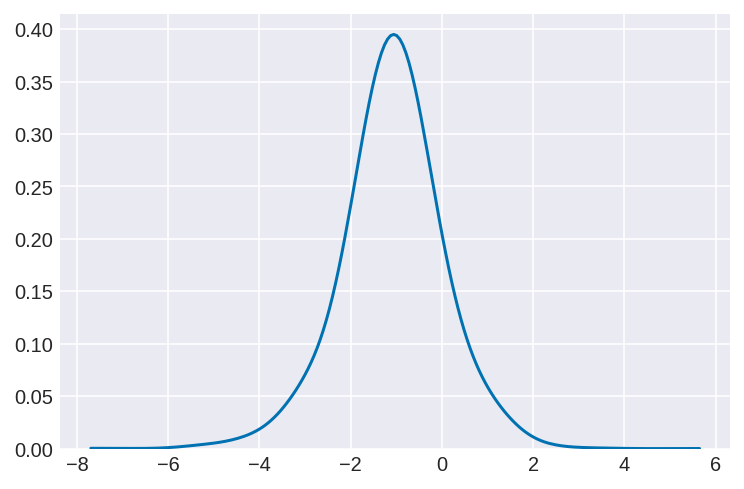

In [40]:
pm.kdeplot(trace_12_4['a_actor'][:, 5-1]);

#### Code 12.30

In [41]:
def p_link(prosoc_left, condition, actor, trace):
    logodds = trace['a'] + \
                trace['a_actor'][:, actor] + \
                (trace['bp'] + trace['bpC'] * condition) * prosoc_left
    return logistic(logodds)

#### Code 12.31

In [42]:
chimp = 6
prosoc_left = [0,1,0,1]
condition = [0,0,1,1]

pred_raw = np.asarray([p_link(p_l, c_d, chimp-1, trace_12_4) 
                       for p_l, c_d in zip(prosoc_left, condition)]).T
pred_p = pred_raw.mean(axis=0)
pred_p_PI = pm.hpd(pred_raw, alpha=.11)

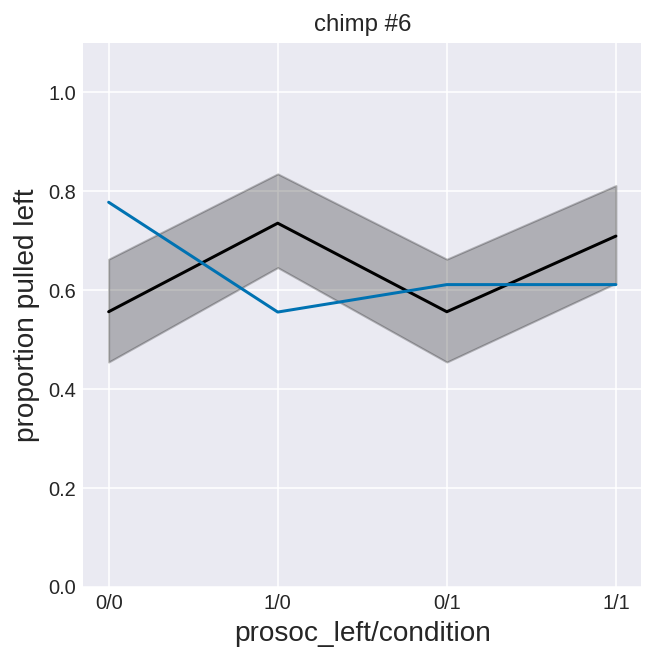

In [43]:
_, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.fill_between(range(4), pred_p_PI[:,1], pred_p_PI[:,0], alpha=0.25, color='k')
ax.plot(pred_p, color='k')
chimps = d.groupby(['actor', 'prosoc_left', 'condition']).agg('mean')['pulled_left'].values.reshape(7, -1)
ax.plot(chimps[chimp-1], 'C0')

ax.set_ylim(0, 1.1)
ax.set_xlabel("prosoc_left/condition", fontsize=14)
ax.set_ylabel("proportion pulled left", fontsize=14)
ax.set_title('chimp #{}'.format(chimp))
plt.xticks(range(4), ("0/0","1/0","0/1","1/1"));

#### Code 12.32

In [44]:
d_pred = pd.DataFrame(dict(prosoc_left=[0, 1, 0, 1],
                           condition=[0, 0, 1, 1], 
                           actor = np.repeat(2-1,4)))

In [45]:
d_pred

,prosoc_left,condition,actor
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,1


#### Code 12.33

In [46]:
# replace varying intercept samples with zeros
# 1000 samples by 7 actors
a_actor_zeros = np.zeros((1000,7))

#### Code 12.34

In [47]:
# link that removes the effect of variation between actors (chimps) IF actor_sim is zeros
# otherwise we use actor_sim to simulate variation based on `sigma_actor`
def p_link(prosoc_left, condition, actor_sim, trace):
    Nsim = actor_sim.shape[0]//trace.nchains
    trace = trace[:Nsim]
    logodds = trace['a'] + \
                np.mean(trace['a_actor']*actor_sim, axis=1) + \
                (trace['bp'] + trace['bpC'] * condition) * prosoc_left
    return logistic(logodds)

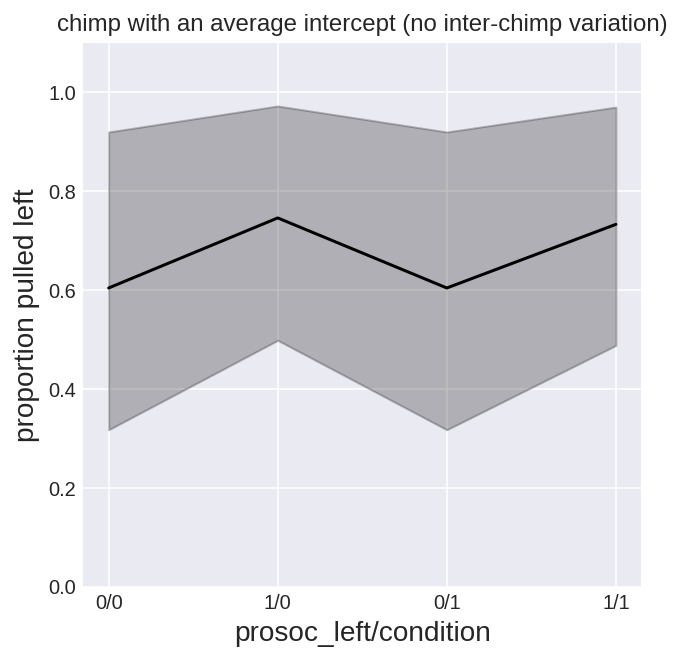

In [48]:
pred_raw = np.asarray([p_link(p_l, c_d, a_actor_zeros, trace_12_4) 
                       for p_l, c_d in zip(prosoc_left, condition)]).T
pred_p = pred_raw.mean(axis=0)
pred_p_PI = pm.hpd(pred_raw, alpha=.11)

_, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.fill_between(range(4), pred_p_PI[:,1], pred_p_PI[:,0], alpha=0.25, color='k')
ax.plot(pred_p, color='k')

ax.set_ylim(0, 1.1)
ax.set_xlabel("prosoc_left/condition", fontsize=14)
ax.set_ylabel("proportion pulled left", fontsize=14)
ax.set_title('chimp with an average intercept (no inter-chimp variation)')
plt.xticks(range(4), ("0/0","1/0","0/1","1/1"));

#### Code 12.35

In [49]:
# replace varying intercept samples with simulations
sigma_actor = trace_12_4.get_values('sigma_actor')
a_actor_sims = np.random.normal(loc=0, 
                                scale=np.reshape(sigma_actor[:7000], (1000, 7)))

#### Code 12.36

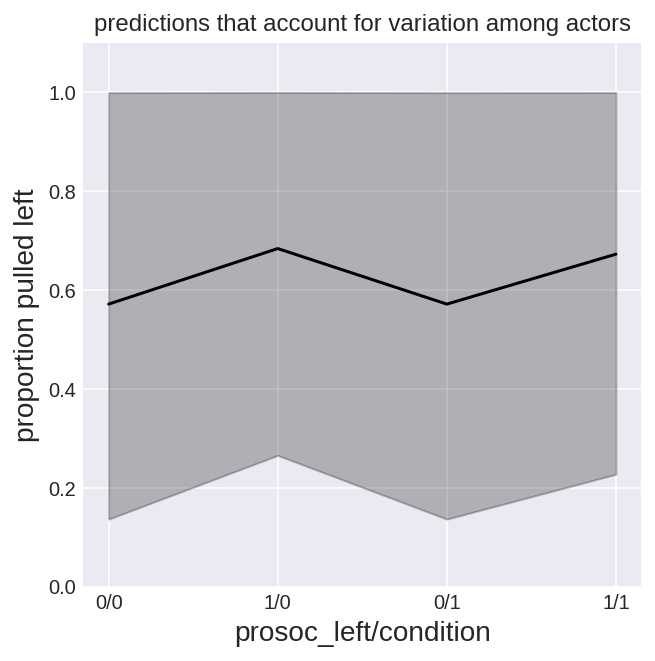

In [50]:
pred_raw = np.asarray([p_link(p_l, c_d, a_actor_sims, trace_12_4) 
                       for p_l, c_d in zip(prosoc_left, condition)]).T
pred_p = pred_raw.mean(axis=0)
pred_p_PI = pm.hpd(pred_raw, alpha=.11)

_, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.fill_between(range(4), pred_p_PI[:,1], pred_p_PI[:,0], alpha=0.25, color='k')
ax.plot(pred_p, color='k')

ax.set_ylim(0, 1.1)
ax.set_xlabel("prosoc_left/condition", fontsize=14)
ax.set_ylabel("proportion pulled left", fontsize=14)
ax.set_title('predictions that account for variation among actors')
plt.xticks(range(4), ("0/0","1/0","0/1","1/1"));

#### Code 12.37

In [51]:
def sim_actor(tr, i):
    sim_a_actor = np.random.normal(loc=0, scale = tr['sigma_actor'][i])
    P = np.array([0, 1, 0, 1])
    C = np.array([0, 1, 0, 1])
    p = logistic(tr['a'][i] + sim_a_actor + (tr['bp'][i] + tr['bpC'][i]*C)*P)
    return p

# sim_actor(trace_12_4, 0)

#### Code 12.38

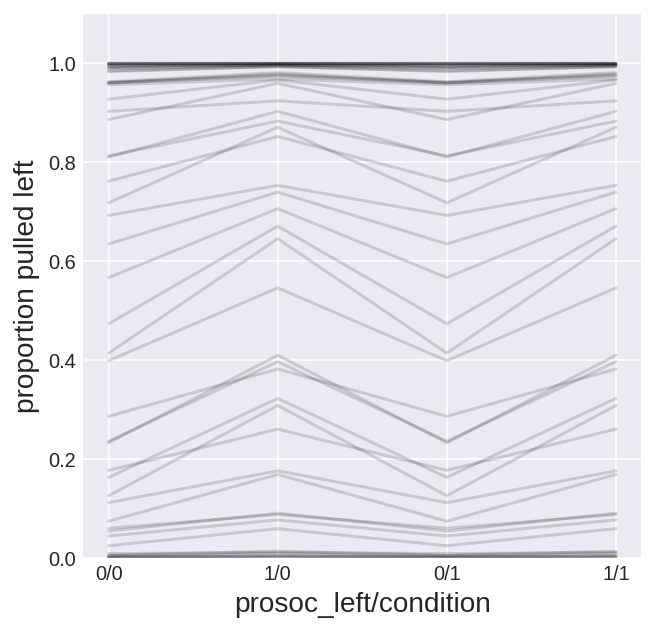

In [52]:
_, ax = plt.subplots(1, 1, figsize=(5, 5))
for i in range(50):
    ax.plot(sim_actor(trace_12_4, i), color='k', alpha=.15)

ax.set_ylim(0, 1.1)
ax.set_xticks(range(4), ("0/0","1/0","0/1","1/1"))
ax.set_xlabel("prosoc_left/condition", fontsize=14)
ax.set_ylabel("proportion pulled left", fontsize=14)
plt.xticks(range(4), ("0/0","1/0","0/1","1/1"));

#### Code 12.39

In [53]:
dk = pd.read_csv('Data/Kline', sep=";")
dk.loc[:, 'log_pop'] = np.log(dk.population)
Nsociety = dk.shape[0]
dk.loc[:, 'society'] = np.arange(Nsociety)

with pm.Model() as m_12_6:
    sigma_society = pm.HalfCauchy('sigma_society', 1)
    a_society = pm.Normal('a_society', 0, sigma_society, shape=Nsociety)
    a = pm.Normal('a', 0, 10)
    bp = pm.Normal('bp', 0, 1)
    lam = pm.math.exp(a + a_society[dk.society.values] + bp*dk.log_pop)
    obs = pm.Poisson('total_tools', lam, observed=dk.total_tools)
    trace_12_6 = pm.sample(5000, tune=1000, njobs=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [bp, a, a_society, sigma_society]
Sampling 4 chains: 100%|██████████| 24000/24000 [02:26<00:00, 163.75draws/s]
There were 226 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6003530707553936, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


#### Code 12.40

In [54]:
sigma_society = trace_12_6.get_values('sigma_society', combine=True)[:, None]
a_society_sims = np.random.normal(loc=0, scale=sigma_society)
log_pop_seq = np.linspace(6, 14, 30)
a_post = trace_12_6.get_values(varname='a', combine=True)[:, None]
bp_post = trace_12_6.get_values(varname='bp', combine=True)[:, None]
link_m12_6 = np.exp(a_post + a_society_sims + bp_post*log_pop_seq)

#### Code 12.41

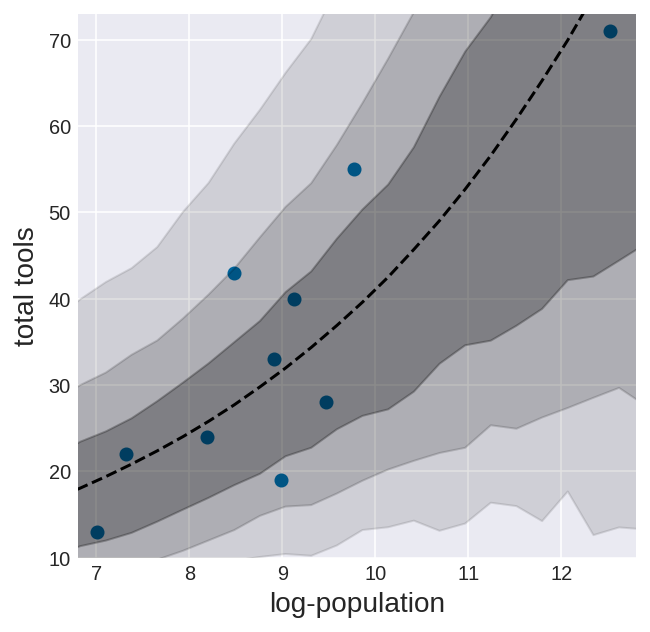

In [55]:
# plot raw data
_, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.scatter(dk.log_pop, dk.total_tools)

axes.plot(log_pop_seq, np.median(link_m12_6, axis=0), '--', color='k')

for alpha in [.67, .89, .97]: 
    alpha = 1-alpha
    mu_hpd = pm.hpd(link_m12_6, alpha=alpha)
    axes.fill_between(log_pop_seq,
                      mu_hpd[:,0], mu_hpd[:,1], alpha=alpha*.5+.1, color='k')

axes.set_xlabel('log-population', fontsize=14)
axes.set_ylabel('total tools', fontsize=14)
axes.set_xlim(6.8, 12.8)
axes.set_ylim(10, 73);

In [56]:
import sys, IPython, scipy, matplotlib, platform
print("This notebook was createad on a computer %s running %s and using:\nPython %s\nIPython %s\nPyMC3 %s\nNumPy %s\nPandas %s\nSciPy %s\nMatplotlib %s\n" % (platform.machine(), ' '.join(platform.linux_distribution()[:2]), sys.version[:5], IPython.__version__, pm.__version__, np.__version__, pd.__version__, scipy.__version__, matplotlib.__version__))

This notebook was createad on a computer x86_64 running debian stretch/sid and using:
Python 3.7.2
IPython 7.6.1
PyMC3 3.6
NumPy 1.16.0
Pandas 0.23.4
SciPy 1.2.0
Matplotlib 3.0.2



/home/damianos/.conda/envs/statRethinkPymc3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: dist() and linux_distribution() functions are deprecated in Python 3.5
  
